In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as imd

In [62]:
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [44]:
## loading dataset
(x_train,y_train),(__,__) = tf.keras.datasets.mnist.load_data()

In [28]:
x_train.shape[0]

60000

Label : 7


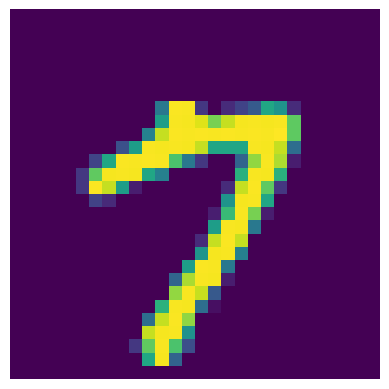

In [38]:
# Disaply Random number & image of dataset
import random
i = random.randint(0,x_train.shape[0])
print("Label : {}".format(y_train[i]))
plt.imshow(x_train[i])
plt.axis('off')
plt.show()

In [119]:
# reshape data x_train
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
X_train.shape

(60000, 28, 28, 1)

In [120]:
X_train.max(),X_train.min()

(255.0, 0.0)

In [121]:
X_train = (X_train- 127.5) /127.5
X_train.max(),X_train.min()

(1.0, -1.0)

In [122]:
# check type
type(X_train)

numpy.ndarray

In [123]:
buffer_size = x_train.shape[0]
batch_size = 255
buffer_size / batch_size 

235.2941176470588

In [124]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [125]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [126]:
# Build generater
def build_generater():
    latent_dim = 100
    model = tf.keras.Sequential()
    model.add(layers.Dense(units=7*7*256, use_bias=False, input_dim=latent_dim))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7,7,256)))

    model.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same', use_bias = False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same', use_bias = False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(filters=1, kernel_size=(5, 5), padding='same', strides=(2, 2), use_bias=True, activation='tanh'))
    model.summary()
    return model

In [127]:
generater = build_generator()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_15                  │ (None, 7, 7, 128)           │         819,200 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_16                  │ (None, 14, 14, 64)          │         204,800 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_17                  │ (None, 28, 28, 1)           │           1,601 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,945 (8.89 MB)

 Trainable params: 2,305,473 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [128]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.25031522,  0.7173838 ,  0.683324  , -0.32596463,  2.0298457 ,
        -1.0734655 , -0.56633866, -2.2835484 ,  0.6655546 , -2.1008935 ,
        -0.5296179 , -0.9233904 ,  0.26042882, -0.42085847,  2.4707482 ,
        -0.8674597 ,  0.55043626, -0.6180472 ,  2.1371949 , -0.21344545,
         0.37603217,  0.6988287 ,  0.6558209 , -2.2237105 ,  0.3451656 ,
        -0.11316886, -0.5745803 ,  0.78350365,  1.1737511 , -1.2994429 ,
        -0.00295203, -0.53657144,  0.57319546, -0.06375613, -0.24865153,
        -0.29838374, -0.6008051 , -0.03247096,  0.5658302 , -0.54766774,
         0.6944623 ,  0.14377075,  0.49424297, -0.03968097,  0.3151558 ,
        -0.9106476 ,  0.4814688 , -1.5983624 , -0.18973131,  0.9593225 ,
        -0.1228963 ,  2.1091595 , -1.3953656 , -1.1781029 , -0.4397788 ,
         0.0196383 , -0.12268325, -1.0076777 ,  0.61519617, -1.1943432 ,
         2.507729  , -1.5283045 , -1.391928  , -0.03567759,  0.25863793,
 

In [129]:
generated_image = generater(noise, training = False)

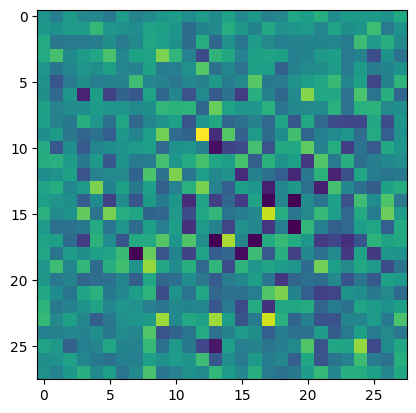

In [130]:
plt.imshow(generated_image[0, :,:,0])

In [131]:
def build_discriminator():
  network = tf.keras.Sequential()

  # 14x14x64
  network.add(layers.Conv2D(filters = 64, strides = (2,2), kernel_size = (5,5), padding = 'same', input_shape = [28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(filters = 128, strides = (2,2), kernel_size = (5,5), padding = 'same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

In [132]:
discriminator = build_discriminator()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_25 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_26 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
discriminator(generated_image, training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00055362]], dtype=float32)>

In [134]:
def discriminator_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [142]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [135]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [136]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [137]:
epochs = 100
noise_dimension = 100
number_of_images = 16

In [138]:
batch_size,noise_dimension

(255, 100)

In [140]:
@tf.function()
def train(images):
    noise = tf.random.normal([batch_size,noise_dimension])
    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        generated_images = generater(noise, training = True)

        expected_output = discriminator(images, training = True)
        fake_output = discriminator(generated_images, training = True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output, fake_output)
        
    generator_gradients = gen_tape.gradient(gen_loss, generater.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generater.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

In [143]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

In [144]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [147]:
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      train(image_batch)
        
    print('Epoch: ', epoch + 1)
    generated_images = generater(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i + 1)
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


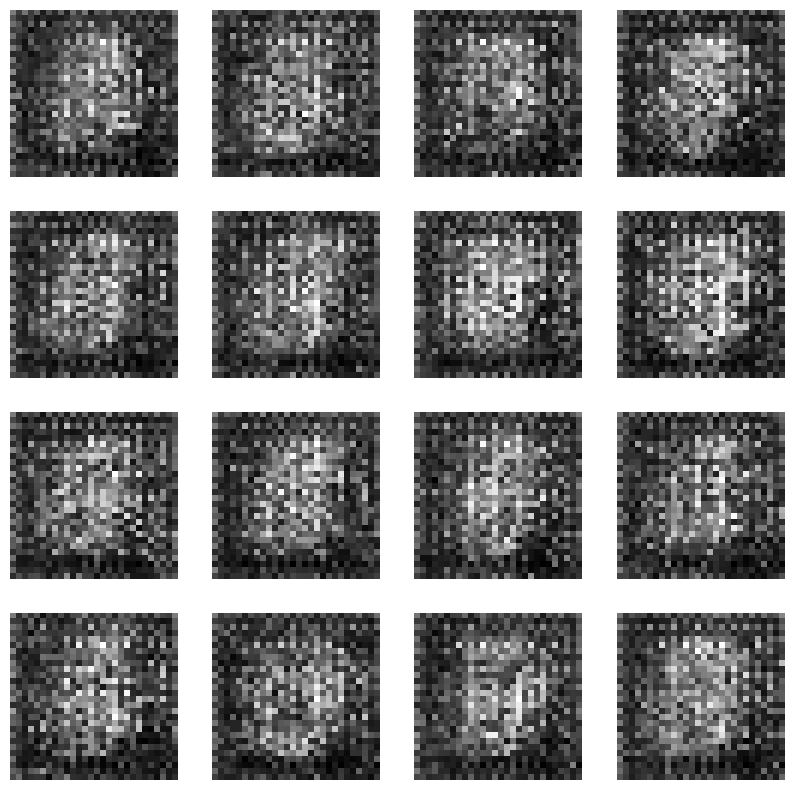

Epoch:  2


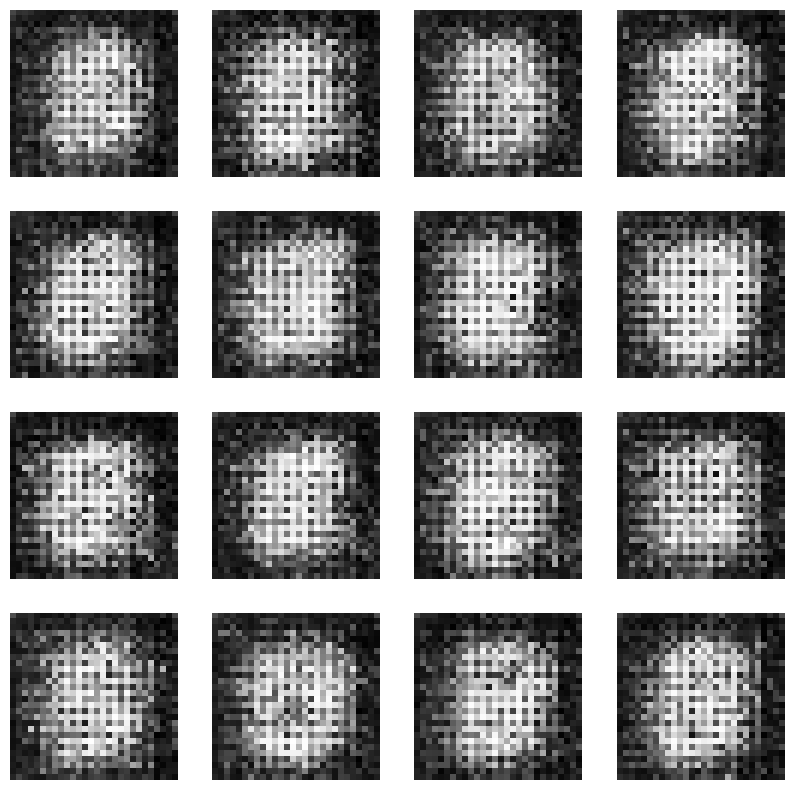

In [ ]:
train_gan(X_train, epochs, test_images)